In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from numpy.fft import rfftn, rfftfreq, fftfreq

In [2]:
L = 1000 # Size of the box in Mpc/h
n_points = 100000
volume = L**3
density = n_points / volume
print(f"Density: {density:.4f} particles per Mpc/h^3")

#create the particles
x, y, z = np.random.uniform(0, L, size=(3, n_points))

Density: 0.0001 particles per Mpc/h^3


In [3]:
#create the density in the grid
n_cells = 64
cell_size = L / n_cells
print(f"Cell size: {cell_size:.2f} Mpc/h")

# Compute the mean density number in the cell
cell_mean_density = n_points / n_cells**3
print(f"Mean density in the cell: {cell_mean_density:.4f} particles per Mpc/h^3")

#create the grid
grid, edges = np.histogramdd((x, y, z), bins=(n_cells, n_cells, n_cells), range=((0, L), (0, L), (0, L)))

density_field = (grid-cell_mean_density)/ cell_mean_density
print(f"Density field shape: {density_field.shape}")



Cell size: 15.62 Mpc/h
Mean density in the cell: 0.3815 particles per Mpc/h^3
Density field shape: (64, 64, 64)


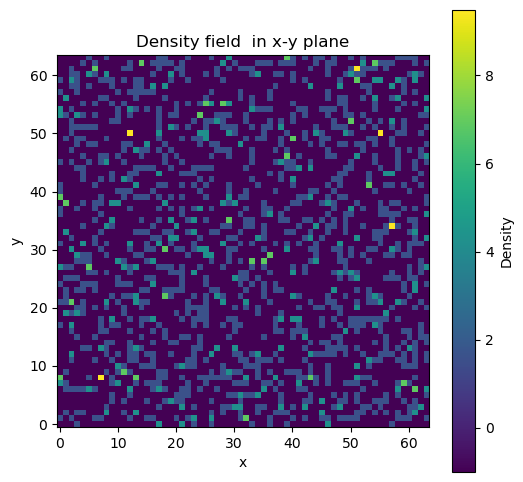

In [4]:
#plot grid fissando z=0
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
im = ax.imshow(density_field[:, :, 0], interpolation='nearest', origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Density field  in x-y plane')
plt.colorbar(im, label='Density')
plt.show()

In [5]:
#compute the delta in fourier space
delta_k = rfftn(density_field)/n_cells**3
print(f"Delta_k shape: {delta_k.shape}")

Delta_k shape: (64, 64, 33)


In [6]:
# create the _grid
kf = 2 * np.pi / L
N = L/n_cells
kN = 2 * np.pi * N/L

kx = fftfreq(n_cells, d=1/n_cells) * kf
ky = fftfreq(n_cells, d=1/n_cells) * kf
kz = rfftfreq(n_cells, d=1/n_cells) * kf

KX, KY, KZ = np.meshgrid(kx, ky, kz)
KK = np.sqrt(KX**2 + KY**2 + KZ**2)

(118772.61000833096-1.025787557797071e-12j)
k edges: [0.00628319 0.01256637 0.01884956 0.02513274 0.03141593 0.03769911
 0.0439823  0.05026548 0.05654867 0.06283185 0.06911504 0.07539822
 0.08168141 0.08796459 0.09424778]


/home/elena/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/elena/anaconda3/envs/acc-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


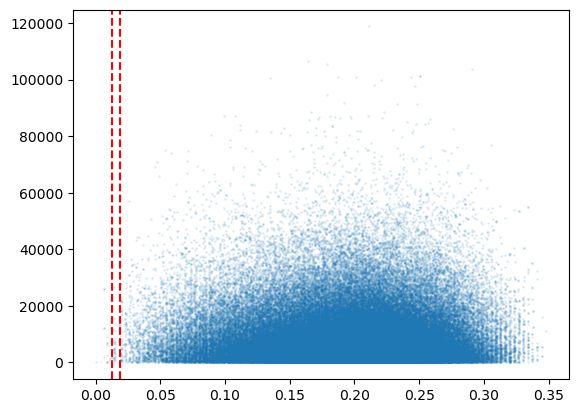

In [7]:
pk_grid = delta_k * np.conjugate(delta_k) * volume
print(np.max(pk_grid))

#binning
c = 1
k_edges = np.arange(kf, kN, c*kf)
print(f"k edges: {k_edges}")

k_bins = 0.5 * (k_edges[1:] + k_edges[:-1])

plt.plot(KK.flatten(), pk_grid.flatten(), 'o', markersize=1, alpha=0.1)
plt.axvline(k_edges[1], color='red', linestyle='--', label='k edges')
plt.axvline(k_edges[2], color='red', linestyle='--')
plt.show()

In [8]:
pk_averaged=np.zeros(k_bins.shape)
k_averaged=np.zeros(k_bins.shape)

for i in range(len(k_bins)):
    mask=(KK.flatten()>=k_edges[i]) & (KK.flatten()<k_edges[i+1])
    pk_averaged[i]=np.mean(pk_grid.flatten()[mask])
    k_averaged[i]=np.mean(KK.flatten()[mask])
    print("k_bins: ", k_bins[i])

k_bins:  0.00942477796076938
k_bins:  0.015707963267948967
k_bins:  0.02199114857512855
k_bins:  0.028274333882308142
k_bins:  0.034557519189487726
k_bins:  0.04084070449666731
k_bins:  0.047123889803846894
k_bins:  0.053407075111026485
k_bins:  0.059690260418206076
k_bins:  0.06597344572538566
k_bins:  0.07225663103256524
k_bins:  0.07853981633974483
k_bins:  0.08482300164692441
k_bins:  0.091106186954104


/tmp/ipykernel_82851/853917072.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  pk_averaged[i]=np.mean(pk_grid.flatten()[mask])


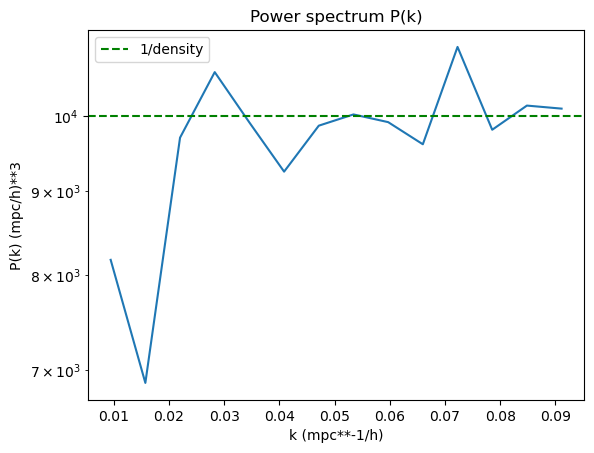

In [9]:
plt.semilogy(k_bins,pk_averaged,'-', markersize=5)
plt.axhline(1./density, color='green', linestyle='--', label='1/density')
plt.xlabel('k (mpc**-1/h)')
plt.ylabel('P(k) (mpc/h)**3')
plt.title('Power spectrum P(k)')
plt.legend()
plt.show()